     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b9a9963c5d6ccb9c26972095a01723b743a2bc3b30828f4513fee433cc57938d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


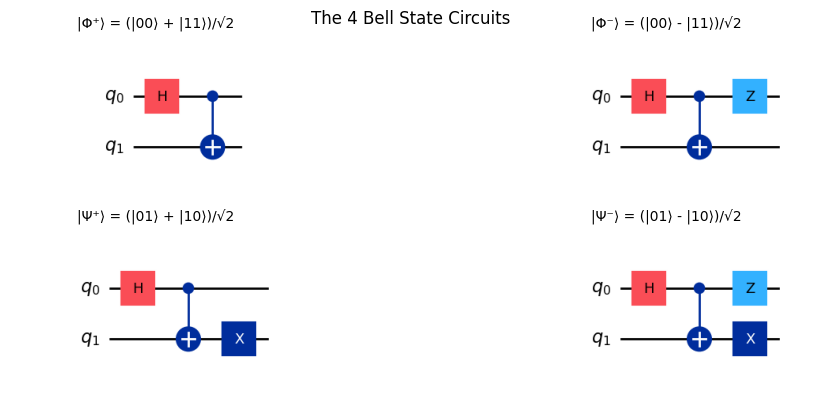

In [ ]:
# Install Qiskit with visualization support
!pip install qiskit[visualization]

# Ensure matplotlib is installed (comes with Colab usually)
!pip install matplotlib

# Install pylatexenc for LaTeX rendering in circuit diagrams
!pip install pylatexenc
from qiskit import QuantumCircuit
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg
import numpy as np

def create_bell_circuits():
    circuits = []

    # |Φ⁺⟩
    qc1 = QuantumCircuit(2)
    qc1.h(0)
    qc1.cx(0, 1)
    circuits.append(("|Φ⁺⟩ = (|00⟩ + |11⟩)/√2", qc1))

    # |Φ⁻⟩
    qc2 = QuantumCircuit(2)
    qc2.h(0)
    qc2.cx(0, 1)
    qc2.z(0)
    circuits.append(("|Φ⁻⟩ = (|00⟩ - |11⟩)/√2", qc2))

    # |Ψ⁺⟩
    qc3 = QuantumCircuit(2)
    qc3.h(0)
    qc3.cx(0, 1)
    qc3.x(1)
    circuits.append(("|Ψ⁺⟩ = (|01⟩ + |10⟩)/√2", qc3))

    # |Ψ⁻⟩
    qc4 = QuantumCircuit(2)
    qc4.h(0)
    qc4.cx(0, 1)
    qc4.x(1)
    qc4.z(0)
    circuits.append(("|Ψ⁻⟩ = (|01⟩ - |10⟩)/√2", qc4))

    return circuits

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 4))
bell_circuits = create_bell_circuits()

for ax, (title, qc) in zip(axs.flat, bell_circuits):
    # Draw each circuit as a figure
    circuit_fig = circuit_drawer(qc, output='mpl', interactive=False)
    canvas = FigureCanvasAgg(circuit_fig)
    canvas.draw()

    # Extract image data and convert to array
    buf = canvas.buffer_rgba()
    img = np.asarray(buf)

    # Plot on subplot
    ax.imshow(img)
    ax.set_title(title, fontsize=10)
    ax.axis('off')

    # Close the individual figure so it doesn't pop up
    plt.close(circuit_fig)

# Display the full subplot
plt.tight_layout()
plt.suptitle("The 4 Bell State Circuits")
plt.show()